Script for plotting evolution of system indicators for single replication of the experiment

In [1]:
### INPUT ###
repl_id = 7
scenario_name = 'sp-repl_id-{}'.format(repl_id)
n_days_eql = 10
dem_mgmt_schemes = ['None', 'cgp10', 'cgp20', 'city_cgp10', 'city_cgp20', 'lpr', 'tmc10', 'tmc10_all_emm', 'tmc10_space', 'tmc10_add_centre_charge']
dem_mgmt_labels = ['None', 'Z-CGP10', 'Z-CGP20', 'C-CGP10', 'C-CGP20', 'LPR', 'TMC-OE', 'TMC-AE', 'TMC-SC', 'TMC-CC']
# dem_mgmt_labels = ['TMC10']
mode_labels = ["Car", "RH - solo", "RH - pool", "PT", "Bike"]

In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from eval_utils import *
import matplotlib.ticker as mtick
import numpy as np

In [3]:
## Initialise evaluation ##

# Set paths
path = os.getcwd()
result_path = os.path.join(path,'..','..','..','results')
if not os.path.exists(os.path.join(path, 'plots', str(repl_id))):
    os.mkdir(os.path.join(path, 'plots', str(repl_id)))

# Initialise dictionaries that will contain different demand management schemes
params = {}
evo_df = {}

In [4]:
# Load different demand management schemes
for scheme in dem_mgmt_schemes:
    # Result path for demand management scenario
    scheme_path = os.path.join(result_path, '{}-{}'.format(scheme, scenario_name))
    if os.path.exists(scheme_path):
        # Load params
        with open(os.path.join(scheme_path,'0_params.json')) as f:
            params[scheme] = json.load(f)
        # Load relevant csv's: market shares and credit market indicators
        market_shares = load_market_indicators(scheme_path)
        market_shares.index.name = 'day'
        evo_df[scheme] = market_shares.copy().drop(['ptcp_dem_mh','ptcp_sup_mh','ptcp_sup_sh_0','ptcp_sup_sh_1'], axis=1)
        # evo_df[scheme] = market_shares[['ptcp_dem_sh_0','ptcp_dem_sh_1','bike','car','pt']].copy()
        evo_df[scheme] = evo_df[scheme].rename(columns={'ptcp_dem_sh_0': 'rh_solo', 'ptcp_dem_sh_1': 'rh_pool', 'paxkm_rs_0': 'paxkm_solo', 'paxkm_rs_1': 'paxkm_pool', 'vkt_rs_0': 'vkt_solo', 'vkt_rs_1': 'vkt_pool'})
        if scheme.startswith('tmc'):
            evo_df[scheme]['not_enough_credit'] = market_shares['not_enough_credit']
            tmc_indicators = load_tmc_indicators(scheme_path)
            tmc_indicators.index.name = 'day'
            evo_df[scheme] = pd.concat([evo_df[scheme], tmc_indicators], axis=1)
            evo_df[scheme] = evo_df[scheme].loc[evo_df[scheme].index >= (params[scheme]['nD'] - params[scheme]['tmc']['duration'])]
            evo_df[scheme].reset_index(drop=True, inplace=True)
            evo_df[scheme].index.name = 'day'

In [5]:
evo_df['tmc10']

,rh_solo,rh_pool,bike,car,pt,not_enough_credit,paxkm_bike,trips_bike_center,paxkm_car,trips_car_center,...,xp_delay,perc_delay,vkt_car,vkt_solo,vkt_pool,total_perc_gtt,price,transaction_volume,oversupply,mean_balance
day,,,,,,,,,,,,,,,,,,,,,
0,112,445,7201,1084,1158,0,42938.629603,2459,6981.796591,334,...,1.235409,1.226613,6981.796591,744.527525,2889.275785,7076.130680,0.07,505163,-4113,300.000000
1,106,430,7237,1048,1179,0,43332.936903,2463,6589.727062,332,...,1.239082,1.229107,6589.727062,697.927029,2902.780276,7115.846039,0.07,562606,109619,288.088686
2,117,423,7226,1062,1172,0,43167.567786,2457,6697.757492,324,...,1.233991,1.230084,6697.757492,782.207433,2826.237276,7103.578600,0.08,552200,-91000,276.651614
3,127,400,7194,1064,1215,0,43085.526874,2465,6559.683041,308,...,1.238561,1.231779,6559.683041,896.189603,2622.085585,7132.843979,0.08,572080,22467,265.092850
4,110,404,7232,1055,1199,0,43337.073074,2467,6614.695186,331,...,1.238457,1.233115,6614.695186,744.942367,2767.955934,7136.453969,0.08,522477,107019,253.653932
5,109,418,7286,1009,1178,0,43656.380400,2490,6185.564334,317,...,1.237018,1.233895,6185.564334,764.716997,2810.107330,7139.741107,0.09,549156,-29447,242.302887
6,118,403,7264,1011,1204,0,43556.322990,2489,6278.668212,312,...,1.236965,1.234509,6278.668212,840.901419,2615.259411,7148.561546,0.09,507282,59043,231.233911
7,108,360,7335,987,1210,0,43994.523735,2510,6012.118715,293,...,1.233724,1.234352,6012.118715,737.970029,2369.319429,7182.383083,0.10,509824,-29176,220.223289
8,94,378,7342,950,1236,0,44197.367301,2509,5745.354620,291,...,1.232204,1.233922,5745.354620,618.364101,2415.616324,7205.897053,0.10,476256,61137,209.740832


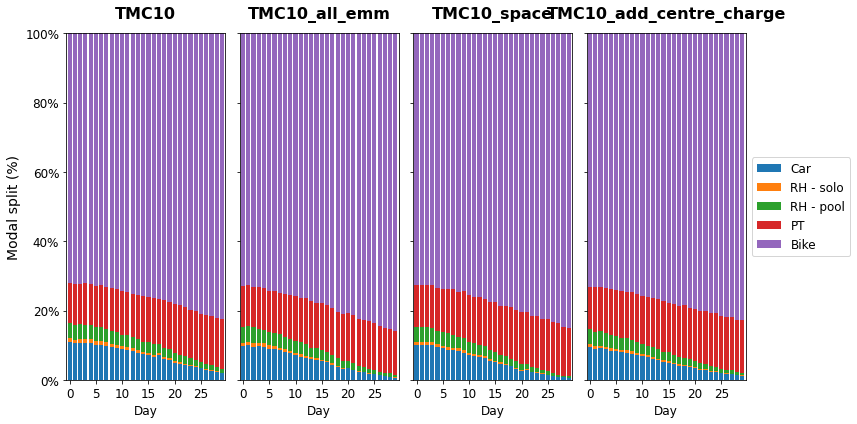

In [6]:
### Plot TMC scenario evolution
n_tmc_scenarios = sum(1 for item in dem_mgmt_schemes if item.startswith("tmc"))
# height_ratios = [2, 1, 1, 1]
fig, axes = plt.subplots(nrows=1, ncols=n_tmc_scenarios, figsize=(12, 6), sharey='row')
i = 0

for scheme in dem_mgmt_schemes:
    if scheme.startswith("tmc"): 
        # Plot 1: market shares
        evo_df[scheme][['car','rh_solo','rh_pool', 'pt', 'bike','not_enough_credit']].div(params[scheme]['nP']).mul(100).plot(kind='bar', stacked=True, ax=axes[i], width=0.8)
        axes[i].set_ylabel('Modal split (%)',fontsize=14)
        axes[i].get_legend().remove()
        axes[i].set_xticks(range(0, params[scheme]['tmc']['duration'], 5))
        axes[i].set_xticklabels(range(0, params[scheme]['tmc']['duration'], 5),rotation=0)
        axes[i].set_xlabel('Day', fontsize=12)
        axes[i].set_ylim(0,100)
        axes[i].yaxis.set_major_formatter(mtick.PercentFormatter())

        # # Plot 4: mean_balance
        # plot_index = 3
        # evo_df[scheme]['mean_balance'].plot(ax=axes[plot_index, i])
        # axes[plot_index, i].set_ylabel('Avg. credit balance', fontsize=14)
        # axes[plot_index, i].set_xlabel('Day', fontsize=12)

        # # Plot 2: credit_price
        # plot_index = 1
        # evo_df[scheme]['price'].plot(ax=axes[plot_index, i])
        # axes[plot_index, i].set_ylabel('Credit price (€)', fontsize=14)
        # axes[plot_index, i].set_xlabel('Day', fontsize=12)

        # # Plot 3: transaction volume
        # plot_index = 2
        # (evo_df[scheme]['transaction_volume'] / params[scheme]['nP']).plot(ax=axes[plot_index, i])
        # ((abs(evo_df[scheme]['oversupply'])) / params[scheme]['nP']).plot(ax=axes[plot_index, i])
        # axes[plot_index, i].set_ylabel('Avg. buy/sell offer quant.', fontsize=14)
        # axes[plot_index, i].set_xlabel('Day', fontsize=12)

        # Subtitle for scheme
        axes[i].set_title('{}'.format(scheme.replace("tmc", "TMC")), fontweight='bold', pad=15, fontsize=16)

        if i == n_tmc_scenarios-1:
            axes[i].legend(labels=mode_labels, bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize=12)
            # axes[2, i].legend(labels=['Successful', 'Denied'], bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize=12)

        i+=1

for a in axes.flatten():
    a.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()
plt.savefig(os.path.join(path, 'plots', str(repl_id), 'tmc-evo-modalsplit.png'), facecolor='w')


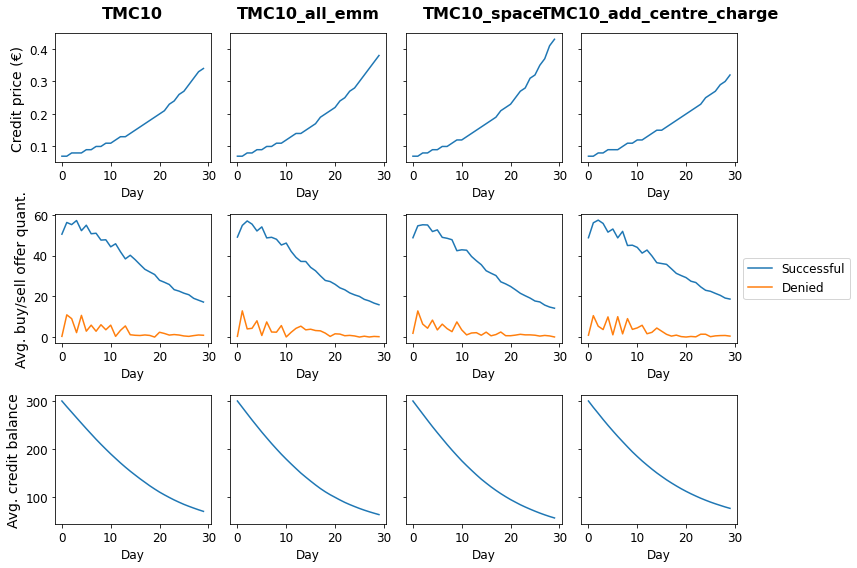

In [7]:
### Plot TMC scenario evolution
n_tmc_scenarios = sum(1 for item in dem_mgmt_schemes if item.startswith("tmc"))
height_ratios = [1, 1, 1]
fig, axes = plt.subplots(nrows=3, ncols=n_tmc_scenarios, figsize=(12, 8), sharey='row', gridspec_kw={'height_ratios': height_ratios})
i = 0

for scheme in dem_mgmt_schemes:
    if scheme.startswith("tmc"): 
        # Plot 1: market shares
        # evo_df[scheme][['car','rh_solo','rh_pool', 'pt', 'bike','not_enough_credit']].div(params[scheme]['nP']).mul(100).plot(kind='bar', stacked=True, ax=axes[0, i], width=0.8)
        # axes[0, i].set_ylabel('Modal split (%)',fontsize=14)
        # axes[0, i].get_legend().remove()
        # axes[0, i].set_xticks(range(0, params[scheme]['tmc']['duration'], 5))
        # axes[0, i].set_xticklabels(range(0, params[scheme]['tmc']['duration'], 5),rotation=0)
        # axes[0, i].set_xlabel('Day', fontsize=12)
        # axes[0, i].set_ylim(0,100)
        # axes[0, i].yaxis.set_major_formatter(mtick.PercentFormatter())

        # Plot 4: mean_balance
        plot_index = 2
        evo_df[scheme]['mean_balance'].plot(ax=axes[plot_index, i])
        axes[plot_index, i].set_ylabel('Avg. credit balance', fontsize=14)
        axes[plot_index, i].set_xlabel('Day', fontsize=12)

        # Plot 2: credit_price
        plot_index = 0
        evo_df[scheme]['price'].plot(ax=axes[plot_index, i])
        axes[plot_index, i].set_ylabel('Credit price (€)', fontsize=14)
        axes[plot_index, i].set_xlabel('Day', fontsize=12)

        # Plot 3: transaction volume
        plot_index = 1
        (evo_df[scheme]['transaction_volume'] / params[scheme]['nP']).plot(ax=axes[plot_index, i])
        ((abs(evo_df[scheme]['oversupply'])) / params[scheme]['nP']).plot(ax=axes[plot_index, i])
        axes[plot_index, i].set_ylabel('Avg. buy/sell offer quant.', fontsize=14)
        axes[plot_index, i].set_xlabel('Day', fontsize=12)

        # Subtitle for scheme
        axes[0, i].set_title('{}'.format(scheme.replace("tmc", "TMC")), fontweight='bold', pad=15, fontsize=16)

        if i == n_tmc_scenarios-1:
            # axes[0, i].legend(labels=mode_labels, bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize=12)
            axes[1, i].legend(labels=['Successful', 'Denied'], bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize=12)

        i+=1

for a in axes.flatten():
    a.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()
plt.savefig(os.path.join(path, 'plots', str(repl_id), 'tmc-evo-trading.png'), facecolor='w')


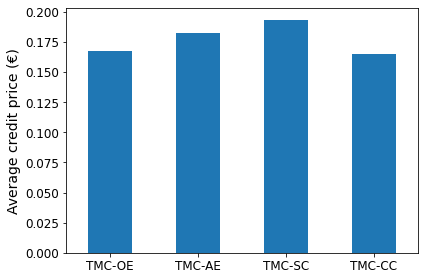

In [8]:
price_dict = dict()
# tmc_labels = []
for scheme in dem_mgmt_schemes:
    if scheme.startswith("tmc"):
        # tmc_labels.append(scheme.replace("tmc", "TMC"))
        price_dict[scheme] = evo_df[scheme].price.mean() 

tmc_labels = [scheme for scheme in dem_mgmt_labels if scheme.startswith('TMC')]
# tmc_labels = ['Local emissions', 'All emissions', 'Space consumption', 'Additional centre charge']
price_dict = {k:[v] for k,v in price_dict.items()}
ax = pd.DataFrame(price_dict).T.plot(kind='bar', figsize=(6, 4), legend=False)
ax.set_xticklabels(tmc_labels, rotation=0, fontsize=12)
ax.tick_params(axis='y', labelsize=12)
# Adding labels and title to the plot
# plt.xlabel('TMC Scenarios')
plt.ylabel('Average credit price (€)', fontsize=14)
# plt.title('Average Credit Price for TMC Scenarios')
plt.tight_layout()

plt.savefig(os.path.join(path, 'plots', str(repl_id),'avg_credit_price.png'), facecolor='w')
# Displaying the plot
plt.show()

In [9]:
evo_df['tmc10'].price
pd.DataFrame(price_dict)

,tmc10,tmc10_all_emm,tmc10_space,tmc10_add_centre_charge
0,0.167667,0.182333,0.193333,0.165


,None,cgp10,cgp20,city_cgp10,city_cgp20,lpr,tmc10,tmc10_all_emm,tmc10_space,tmc10_add_centre_charge
car,17.034,13.332,12.165,4.811,0.949,8.681,7.012000,5.402000,5.396667,5.219667
rh_solo,2.417,1.657,1.473,0.485,0.137,2.796,0.670333,0.500333,0.439000,0.450333
rh_pool,4.302,5.699,5.990,8.107,9.121,5.192,2.942333,2.694000,2.493667,2.482333
pt,9.643,10.899,11.310,13.588,15.293,12.633,13.050333,12.893000,13.827000,14.288000
bike,66.604,68.413,69.062,73.009,74.500,70.698,76.325000,78.510667,77.842667,77.559667
not_enough_credit,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0.000000,0.001000,0.000000


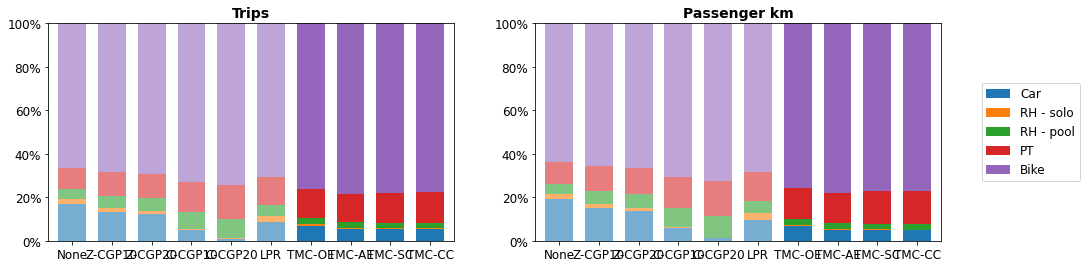

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

### Determine average indicators for TMC scenario - market share in trips
modal_split_trips = pd.DataFrame()
for scheme in dem_mgmt_schemes:
    if not scheme.startswith('tmc'):
        modal_split_trips[scheme] = evo_df[scheme][['car','rh_solo','rh_pool', 'pt', 'bike','not_enough_credit']].tail(n_days_eql).sum().div(params[scheme]['nP']*n_days_eql).mul(100)
    else:
        modal_split_trips[scheme] = evo_df[scheme][['car','rh_solo','rh_pool', 'pt', 'bike','not_enough_credit']].sum().div(params[scheme]['nP']*params[scheme]['tmc']['duration']).mul(100)
modal_split_trips.T.plot.bar(stacked=True, rot=0, ax=axes[0], width=0.7)
axes[0].get_legend().remove()
axes[0].set_xticklabels(dem_mgmt_labels)
axes[0].set_title('Trips', fontweight='bold', fontsize=14)
axes[0].set_ylim(0,100)
axes[0].yaxis.set_major_formatter(mtick.PercentFormatter())
modal_split_trips

### Determine average indicators for TMC scenario - market share in pax km
modal_split_paxkm = pd.DataFrame()
for scheme in dem_mgmt_schemes:
    df = evo_df[scheme][['paxkm_car','paxkm_solo','paxkm_pool','paxkm_pt', 'paxkm_bike']]
    if not scheme.startswith('tmc'):
        modal_split_paxkm[scheme] = df.tail(n_days_eql).sum(axis=0).div(df.tail(n_days_eql).sum().sum()).mul(100)
    else:
        modal_split_paxkm[scheme] = df.sum(axis=0).div(df.sum().sum()).mul(100)
modal_split_paxkm.T.plot.bar(stacked=True, ax=axes[1], width=0.7, rot=0)
axes[1].set_xticklabels(dem_mgmt_labels, fontsize=12)
axes[1].legend(labels=mode_labels, bbox_to_anchor=(1.1, 0.5), loc="center left", borderaxespad=0, fontsize=12)
axes[1].set_title('Passenger km', fontweight='bold', fontsize = 14)
axes[1].set_ylim(0,100)
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter())
modal_split_paxkm

for a in axes.flatten():
    a.tick_params(axis='both', which='major', labelsize=12)

alpha_array = np.array([1.0 if name.startswith('tmc') else 0.6 for name in dem_mgmt_schemes])
# Apply transparency conditionally for each bar segment
for container in axes[0].containers:
    for i, bar in enumerate(container):
        bar.set_alpha(alpha_array[i])
for container in axes[1].containers:
    for i, bar in enumerate(container):
        bar.set_alpha(alpha_array[i])

plt.savefig(os.path.join(path, 'plots', str(repl_id),'market-shares.png'), facecolor='w')

modal_split_trips

,None,cgp10,cgp20,city_cgp10,city_cgp20,lpr,tmc10,tmc10_all_emm,tmc10_space,tmc10_add_centre_charge
car,17.034,13.332,12.165,4.811,0.949,8.681,7.012000,5.402000,5.396667,5.219667
rh_solo,2.417,1.657,1.473,0.485,0.137,2.796,0.670333,0.500333,0.439000,0.450333
rh_pool,4.302,5.699,5.990,8.107,9.121,5.192,2.942333,2.694000,2.493667,2.482333
pt,9.643,10.899,11.310,13.588,15.293,12.633,13.050333,12.893000,13.827000,14.288000
bike,66.604,68.413,69.062,73.009,74.500,70.698,76.325000,78.510667,77.842667,77.559667
not_enough_credit,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0.000000,0.001000,0.000000


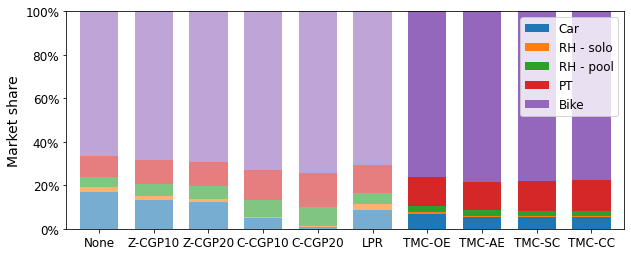

In [11]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

### Determine average indicators for TMC scenario - market share in trips
modal_split_trips = pd.DataFrame()
for scheme in dem_mgmt_schemes:
    if not scheme.startswith('tmc'):
        modal_split_trips[scheme] = evo_df[scheme][['car','rh_solo','rh_pool', 'pt', 'bike','not_enough_credit']].tail(n_days_eql).sum().div(params[scheme]['nP']*n_days_eql).mul(100)
    else:
        modal_split_trips[scheme] = evo_df[scheme][['car','rh_solo','rh_pool', 'pt', 'bike','not_enough_credit']].sum().div(params[scheme]['nP']*params[scheme]['tmc']['duration']).mul(100)
ax = modal_split_trips.T.plot.bar(stacked=True, rot=0, width=0.7, figsize=(10,4))
ax.legend(mode_labels, fontsize=12)
ax.set_xticklabels(dem_mgmt_labels)
ax.set_ylim(0,100)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
modal_split_trips

ax.set_ylabel('Market share', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

alpha_array = np.array([1.0 if name.startswith('tmc') else 0.6 for name in dem_mgmt_schemes])
# Apply transparency conditionally for each bar segment
for container in ax.containers:
    for i, bar in enumerate(container):
        bar.set_alpha(alpha_array[i])

plt.savefig(os.path.join(path, 'plots', str(repl_id),'market-shares_trips_only.png'), facecolor='w')

modal_split_trips

In [12]:
# ## Market share in trips for which the shortest path by car traverses the city centre
# modal_split_trips_center = pd.DataFrame()
# for scheme in dem_mgmt_schemes:
#     if not scheme.startswith('tmc'):
#         modal_split_trips_center[scheme] = evo_df[scheme][['car','rh_solo','rh_pool', 'pt', 'bike','not_enough_credit']].tail(n_days_eql).sum().div(params[scheme]['nP']*n_days_eql).mul(100)
#     else:
#         modal_split_trips_center[scheme] = evo_df[scheme][['car','rh_solo','rh_pool', 'pt', 'bike','not_enough_credit']].sum().div(params[scheme]['nP']*params[scheme]['tmc']['duration']).mul(100)
# ax = modal_split_trips_center.T.plot.bar(stacked=True, rot=0, width=0.7)
# ax.get_legend().remove()
# ax.set_xticklabels(dem_mgmt_labels)
# ax.set_title('Trips', fontweight='bold', fontsize=14)
# ax.set_ylim(0,100)
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# modal_split_trips

None                       1.000000
cgp10                      0.865047
cgp20                      0.817962
city_cgp10                 0.563380
city_cgp20                 0.421846
lpr                        0.715169
tmc10                      0.387082
tmc10_all_emm              0.313652
tmc10_space                0.302729
tmc10_add_centre_charge    0.290670
dtype: float64

<Figure size 2160x432 with 0 Axes>

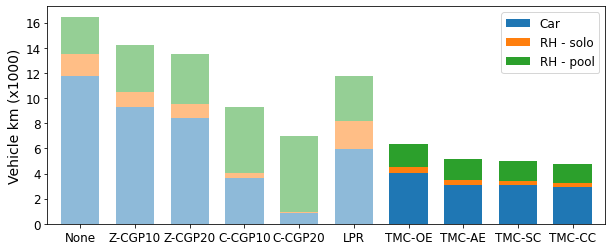

In [13]:
fig = plt.figure(figsize=(30, 6))

# Vehicle kilometres
vkt = pd.DataFrame()
for scheme in dem_mgmt_schemes:
    if not scheme.startswith('tmc'):
        vkt[scheme] = evo_df[scheme][['vkt_car', 'vkt_solo', 'vkt_pool']].tail(n_days_eql).mean()
    else:
        vkt[scheme] = evo_df[scheme][['vkt_car', 'vkt_solo', 'vkt_pool']].mean()
ax = (vkt / 1000).T.plot.bar(stacked=True, rot=0, width=0.7, figsize=(10, 4))
ax.set_xticklabels(dem_mgmt_labels, fontsize=12)
ax.set_ylabel('Vehicle km (x1000)', fontsize=14)
ax.legend(labels=['Car', 'RH - solo', 'RH - pool'], fontsize=12)

alpha_array = np.array([1.0 if name.startswith('tmc') else 0.5 for name in dem_mgmt_schemes])
# Apply transparency conditionally for each bar segment
for container in ax.containers:
    for i, bar in enumerate(container):
        bar.set_alpha(alpha_array[i])

ax.tick_params(axis='both', which='major', labelsize=12)
plt.savefig(os.path.join(path, 'plots', str(repl_id), 'vkt.png'), facecolor='w')
(vkt / vkt['None'].sum()).sum(axis=0)

None                       1.000000
cgp10                      0.865047
cgp20                      0.817962
city_cgp10                 0.563380
city_cgp20                 0.421846
lpr                        0.715169
tmc10                      0.387082
tmc10_all_emm              0.313652
tmc10_space                0.302729
tmc10_add_centre_charge    0.290670
dtype: float64

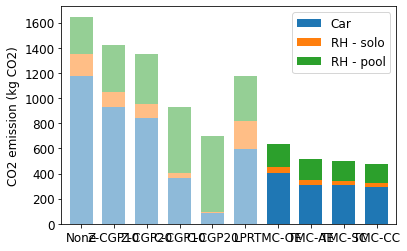

In [14]:
# CO2 emissions
co2 = pd.DataFrame()
for scheme in dem_mgmt_schemes:
    if not scheme.startswith('tmc'):
        co2[scheme] = evo_df[scheme][['vkt_car', 'vkt_solo', 'vkt_pool']].tail(n_days_eql).mean() * 0.1 * 1000 # kg CO2
        # co2[scheme]['pt'] = evo_df[scheme]['paxkm_pt'].tail(n_days_eql).mean() * 0.04 # kg CO2
        co2[scheme]['alpha'] = 1
    else:
        co2[scheme] = evo_df[scheme][['vkt_car', 'vkt_solo', 'vkt_pool']].mean() * 0.1 * 1000 # kg CO2
        # co2[scheme] = evo_df[scheme][['paxkm_pt']].mean() * 0.04 # kg CO2
        co2[scheme]['alpha'] = 0.5
ax = (co2 / 1000).T.plot.bar(stacked=True, rot=0, width=0.7)
ax.set_xticklabels(dem_mgmt_labels, fontsize=12)
ax.set_ylabel('CO2 emission (kg CO2)', fontsize=12)
ax.legend(labels=['Car', 'RH - solo', 'RH - pool'], fontsize=12)

# col_names = co2.columns.values.tolist()
alpha_array = np.array([1.0 if name.startswith('tmc') else 0.5 for name in dem_mgmt_schemes])
# Apply transparency conditionally for each bar segment
for container in ax.containers:
    for i, bar in enumerate(container):
        bar.set_alpha(alpha_array[i])
# # Apply transparency conditionally
# for bar, alpha in zip(ax.patches, alpha_array):
#     print(bar, alpha)
#     bar.set_alpha(alpha)


ax.tick_params(axis='both', which='major', labelsize=12)
plt.savefig(os.path.join(path, 'plots', str(repl_id), 'co2.png'), facecolor='w')
(co2 / co2['None'].sum()).sum(axis=0)

In [15]:
co2

,None,cgp10,cgp20,city_cgp10,city_cgp20,lpr,tmc10,tmc10_all_emm,tmc10_space,tmc10_add_centre_charge
vkt_car,1.172220e+06,924963.846480,843525.439810,361190.52932,83055.569950,595918.60899,406320.176910,312387.052273,311282.060233,293745.961490
vkt_solo,1.773444e+05,124973.459120,107731.577820,41367.30800,11536.119720,218398.27881,44046.544427,32637.905119,28612.584753,27401.707663
vkt_pool,2.974263e+05,374786.659745,395918.160209,525324.02752,600184.694986,363559.13664,187153.894934,171556.677550,158697.684347,157583.099484


,None,cgp10,cgp20,city_cgp10,city_cgp20,lpr,tmc10,tmc10_all_emm,tmc10_space,tmc10_add_centre_charge
total_perc_gtt,1.0,1.015213,1.0214,1.048997,1.068137,1.036126,1.081034,1.089882,1.091899,1.093423


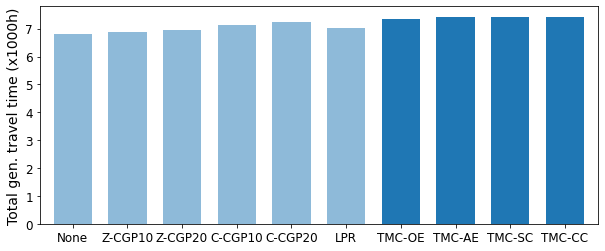

In [16]:
# Perceived gtt
perc_gtt = pd.DataFrame()
for scheme in dem_mgmt_schemes:
    if not scheme.startswith('tmc'):
        perc_gtt[scheme] = evo_df[scheme][['total_perc_gtt']].tail(n_days_eql).mean()
    else:
        perc_gtt[scheme] = evo_df[scheme][['total_perc_gtt']].mean()
ax = (perc_gtt / 1000).T.plot.bar(rot=0, width=0.7, figsize=(10,4))
ax.set_xticklabels(dem_mgmt_labels, fontsize=12)

alpha_array = np.array([1.0 if name.startswith('tmc') else 0.5 for name in dem_mgmt_schemes])
# Apply transparency conditionally for each bar segment
for container in ax.containers:
    for i, bar in enumerate(container):
        bar.set_alpha(alpha_array[i])

ax.get_legend().remove()
ax.set_ylabel('Total gen. travel time (x1000h)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.savefig(os.path.join(path, 'plots', str(repl_id), 'gtt.png'), facecolor='w')

perc_gtt / perc_gtt.loc['total_perc_gtt']['None']

In [17]:
# TMC - Indicators on last day, and passenger properties
travs_df = dict()
pax_prop = dict()
for scheme in dem_mgmt_schemes:
    if scheme.startswith("tmc"):
        last_day = evo_df[scheme].index.values[-1]
        travs_df[scheme] = pd.read_csv(os.path.join(result_path, '{}-{}'.format(scheme, scenario_name), 'day_{}_travs.csv'.format(last_day)))
        pax_prop = pd.read_csv(os.path.join(result_path, '{}-{}'.format(scheme, scenario_name), '1_pax-properties.csv'))
        travs_df[scheme] = pd.concat([travs_df[scheme], pax_prop], axis=1)
travs_df['tmc10']

,pax,chosen_mode,time_occ_1,time_occ_2,informed,days_since_reg,tmc_balance,net_purchase,denied_order,money_balance,...,PTfare,through_center,haver_dist,VoT,ASC_rs,ASC_pool,ASC_car,ASC_pt,ASC_bike,multihoming
0,0,bike,NaN,NaN,True,35,22.208360,-36,0,-2.68,...,1.42,True,2329.995757,54.052523,-4.906045,-5.053016,-2.409659,-5.325089,-4.879021,False
1,1,bike,NaN,NaN,True,35,89.000000,10,0,24.21,...,2.15,True,5050.466020,6.255701,-6.504645,-6.928185,-2.932639,-5.776082,3.227358,False
2,2,bike,NaN,NaN,True,35,40.000000,-44,0,45.77,...,2.94,False,6151.046834,10.301100,-4.146319,-4.449206,0.379101,-4.783853,6.796144,False
3,3,car,NaN,NaN,True,35,10.057320,38,0,-224.40,...,3.52,True,4285.472220,14.983458,-5.662580,-6.169324,1.467991,-4.384830,-15.311250,False
4,4,bike,NaN,NaN,True,35,88.652640,28,0,8.95,...,2.33,False,5966.747219,4.529029,-5.884906,-6.361114,-0.627416,-4.120145,-3.725884,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,bike,NaN,NaN,True,35,89.000000,0,-10,20.53,...,1.86,False,3569.613358,6.195605,-8.324648,-8.342242,-3.226956,-2.645847,4.791605,False
9996,9996,bike,NaN,NaN,True,35,159.000000,42,0,2.88,...,3.41,False,9856.090756,4.455437,-4.503400,-4.724824,-2.334272,-5.484279,3.369542,False
9997,9997,bike,NaN,NaN,True,35,79.925400,0,-3,-3.06,...,2.30,True,3240.185398,21.192935,-4.705935,-4.805307,-0.534633,-4.822486,-1.220508,False
9998,9998,pt,NaN,NaN,True,35,65.981955,-17,0,-43.15,...,1.82,True,4088.713553,29.732447,-4.617013,-4.858241,-5.202971,-3.434073,-10.495752,False


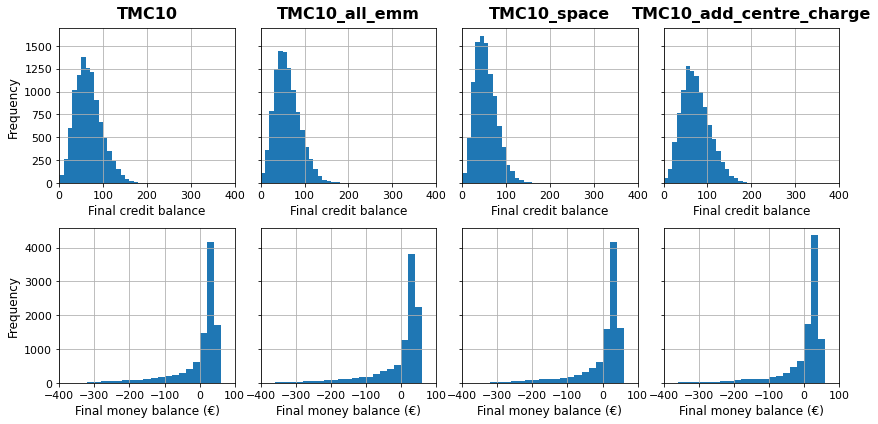

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=n_tmc_scenarios, figsize=(12, 6), sharey='row')
i = 0
for scheme in dem_mgmt_schemes:
    if scheme.startswith("tmc"):
        travs_df[scheme].tmc_balance.hist(ax=axes[0,i],bins=range(0, 400, 10))
        axes[0, i].set_xlim(0,400)
        axes[0, i].set_xlabel('Final credit balance', fontsize=12)

        travs_df[scheme].money_balance.hist(ax=axes[1,i], bins=range(-400, 100, 20))
        axes[1, i].set_xlabel('Final money balance (€)', fontsize=12)
        axes[1, i].set_xlim(-400,100)

        # Subtitle for scheme
        axes[0, i].set_title('{}'.format(scheme.replace("tmc", "TMC")), fontweight='bold', pad=10, fontsize=16)

        i+=1
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)

for a in axes.flatten():
    a.tick_params(axis='both', which='major', labelsize=11)

fig.tight_layout()
plt.savefig(os.path.join(path, 'plots', str(repl_id), 'balance-distr.png'), facecolor='w')

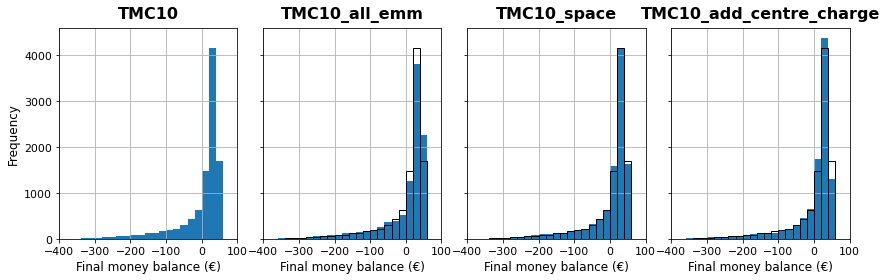

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=n_tmc_scenarios, figsize=(12, 4), sharey='row')
i = 0
for scheme in dem_mgmt_schemes:
    if scheme.startswith("tmc"):
        travs_df[scheme].money_balance.hist(ax=axes[i], bins=range(-400, 100, 20))
        axes[i].set_xlabel('Final money balance (€)', fontsize=12)
        axes[i].set_xlim(-400,100)

        # Subtitle for scheme
        axes[i].set_title('{}'.format(scheme.replace("tmc", "TMC")), fontweight='bold', pad=10, fontsize=16)

        i+=1

for i in range(1,4):
    axes[i].hist(travs_df['tmc10'].money_balance, bins=range(-400,100,20), edgecolor='black', facecolor='none', zorder=2)

axes[0].set_ylabel('Frequency', fontsize=12)
# axes[1, 0].set_ylabel('Frequency', fontsize=12)

for a in axes.flatten():
    a.tick_params(axis='both', which='major', labelsize=11)

fig.tight_layout()
plt.savefig(os.path.join(path, 'plots', str(repl_id), 'money-balance-distr.png'), facecolor='w')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


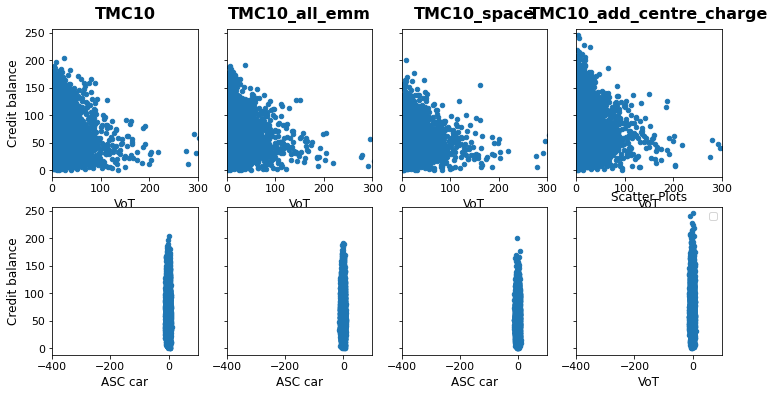

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=n_tmc_scenarios, figsize=(12, 6), sharey='row')
i = 0
for scheme in dem_mgmt_schemes:
    if scheme.startswith("tmc"):
        travs_df[scheme].plot.scatter(x='VoT',y='tmc_balance', ax=axes[0,i])
        axes[0, i].set_xlim(0,300)
        axes[0, i].set_xlabel('VoT', fontsize=12)

        travs_df[scheme].plot.scatter(x='ASC_car',y='tmc_balance', ax=axes[1,i])
        axes[1, i].set_xlabel('ASC car', fontsize=12)
        axes[1, i].set_xlim(-400,100)

        # Subtitle for scheme
        axes[0, i].set_title('{}'.format(scheme.replace("tmc", "TMC")), fontweight='bold', pad=10, fontsize=16)

        i+=1
axes[0, 0].set_ylabel('Credit balance', fontsize=12)
axes[1, 0].set_ylabel('Credit balance', fontsize=12)

for a in axes.flatten():
    a.tick_params(axis='both', which='major', labelsize=11)


# Get the columns starting with 'ASC'
asc_columns = [col for col in df.columns if col.startswith('ASC')]

# Create scatter plots
for column in asc_columns:
    plt.scatter(df['VoT'], df[column], label=column)

# Set labels and title
plt.xlabel('VoT')
plt.ylabel('tmc_balance')
plt.title('Scatter Plots')
plt.legend()

# Show the plot
plt.show()

In [21]:
# fig, axes = plt.subplots(nrows=1, ncols=n_tmc_scenarios, figsize=(12, 6), sharey='row', sharex=True)
# i = 0
# for scheme in dem_mgmt_schemes:
#     if scheme.startswith("tmc"):
#         travs_df[scheme].money_balance.hist(ax=axes[i])
#         i+=1
# # travs_df.money_balance.hist(bins=20)

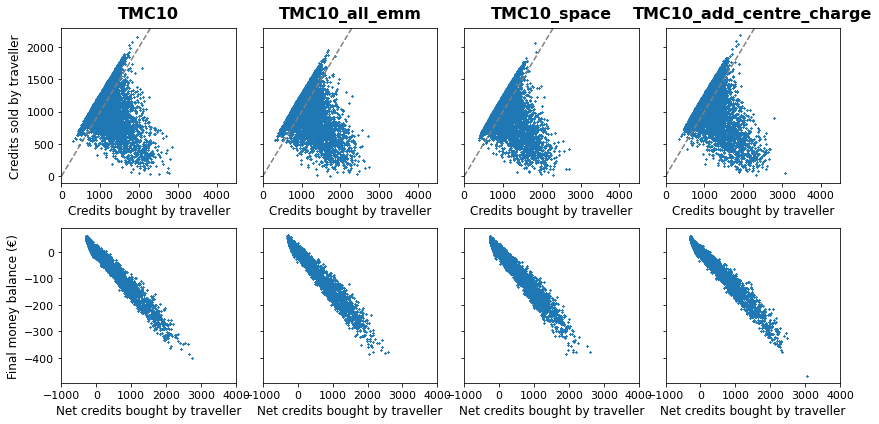

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=n_tmc_scenarios, figsize=(12, 6), sharey='row')
i = 0
for scheme in dem_mgmt_schemes:
    if scheme.startswith("tmc"):
        travs_df[scheme].plot.scatter(x='tot_credit_bought', y='tot_credit_sold', marker='x', s=2, ax=axes[0, i])
        travs_df[scheme]['net_bought'] = travs_df[scheme].tot_credit_bought - travs_df[scheme].tot_credit_sold
        axes[0, i].axline((0, 0), slope=1, linestyle='--', color='grey')
        axes[0, i].set_xlabel('Credits bought by traveller', fontsize=12)
        axes[0, i].set_ylabel('Credits sold by traveller', fontsize=12)
        axes[0, i].set_xlim(0,4500)
        
        travs_df[scheme].plot.scatter(x='net_bought', y='money_balance', marker='x', s=2, ax=axes[1, i])
        axes[1, i].set_xlabel('Net credits bought by traveller', fontsize=12)
        axes[1, i].set_ylabel("Final money balance (€)", fontsize=12)
        axes[1, i].set_xlim(-1000,4000)

        # Subtitle for scheme
        axes[0, i].set_title('{}'.format(scheme.replace("tmc", "TMC")), fontweight='bold', pad=10, fontsize=16)

        i+=1
fig.tight_layout()
for a in axes.flatten():
    a.tick_params(axis='both', which='major', labelsize=11)
plt.savefig(os.path.join(path, 'plots', str(repl_id), 'buy-sell-stat.png'), facecolor='w')

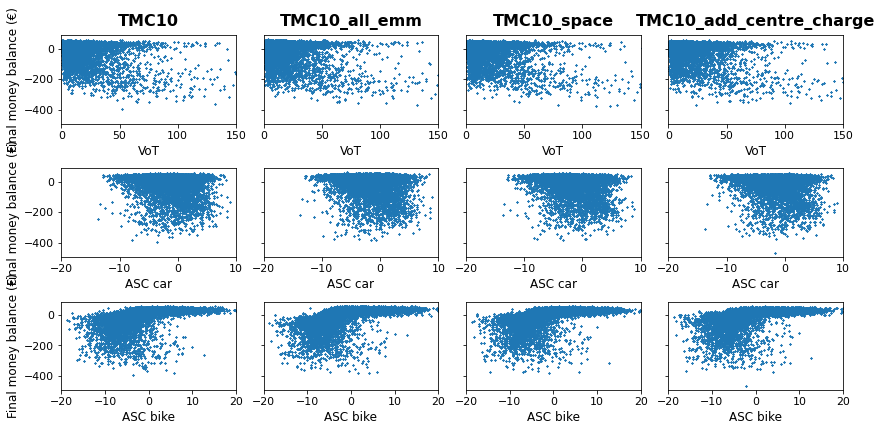

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=n_tmc_scenarios, figsize=(12, 6), sharey='row')
i = 0
for scheme in dem_mgmt_schemes:
    if scheme.startswith("tmc"):
        travs_df[scheme].plot.scatter(x='VoT', y='money_balance', marker='x', s=2, ax=axes[0, i])
        axes[0, i].set_xlabel('VoT', fontsize=12)
        axes[0, i].set_ylabel('Final money balance (€)', fontsize=12)
        axes[0, i].set_xlim(0,150)
        
        travs_df[scheme].plot.scatter(x='ASC_car', y='money_balance', marker='x', s=2, ax=axes[1, i])
        axes[1, i].set_xlabel('ASC car', fontsize=12)
        axes[1, i].set_ylabel("Final money balance (€)", fontsize=12)
        axes[1, i].set_xlim(-20,10)

        travs_df[scheme].plot.scatter(x='ASC_bike', y='money_balance', marker='x', s=2, ax=axes[2, i])
        axes[2, i].set_xlabel('ASC bike', fontsize=12)
        axes[2, i].set_ylabel("Final money balance (€)", fontsize=12)
        axes[2, i].set_xlim(-20,20)

        # Subtitle for scheme
        axes[0, i].set_title('{}'.format(scheme.replace("tmc", "TMC")), fontweight='bold', pad=10, fontsize=16)

        i+=1
fig.tight_layout()
for a in axes.flatten():
    a.tick_params(axis='both', which='major', labelsize=11)
plt.savefig(os.path.join(path, 'plots', str(repl_id), 'distr_effects.png'), facecolor='w')

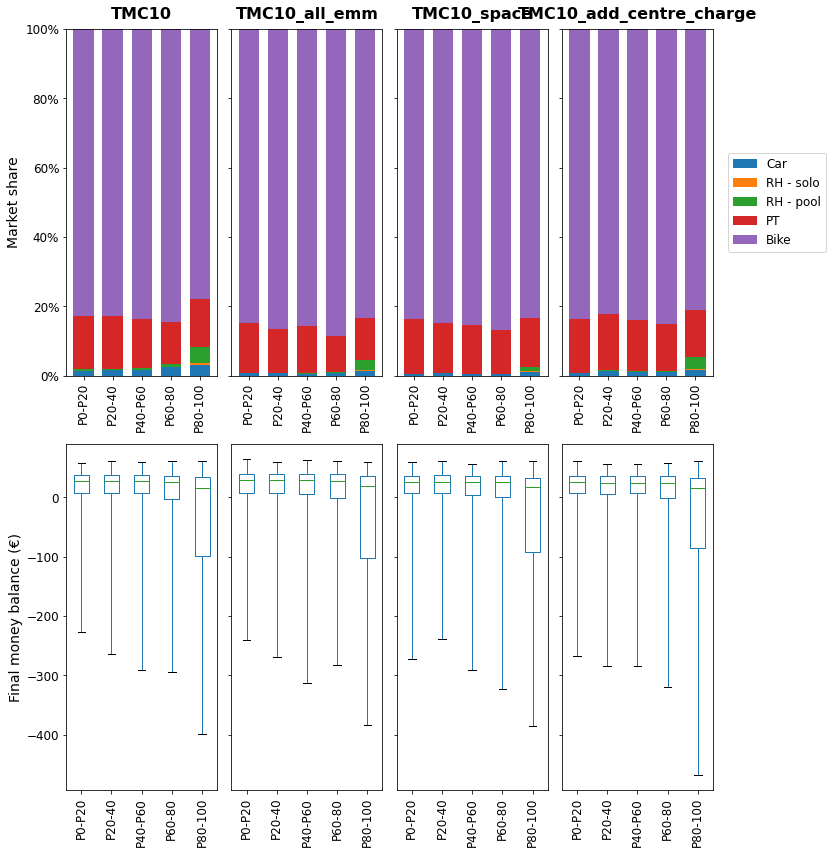

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=n_tmc_scenarios, figsize=(12, 12), sharey='row')
i = 0
for scheme in dem_mgmt_schemes:
    if scheme.startswith("tmc"):
        df = travs_df[scheme].copy()
        df['VoT_group'] = pd.qcut(travs_df[scheme]['VoT'], q=5, labels=['P0-P20', 'P20-40', 'P40-P60', 'P60-80', 'P80-100'])
        pivot_table = df.groupby(['VoT_group', 'chosen_mode']).size().unstack(fill_value=0) / (len(df) / 5) * 100
        pivot_table[['car','rs_0','rs_1', 'pt', 'bike']].plot(kind='bar', stacked=True, ax=axes[0, i], width=0.7)
        axes[0, i].yaxis.set_major_formatter(mtick.PercentFormatter())
        axes[0, i].set_ylim(0,100)
        axes[0, i].set_xlabel('')
        axes[0, i].tick_params(axis='y', which='major', labelsize=20)
        # mean_money_per_group = df.groupby('VoT_group')['money_balance'].mean()
        # mean_money_per_group.plot(kind='bar', stacked=True, ax=axes[1, i])

        df.boxplot(column='money_balance', by='VoT_group', grid=False, ax=axes[1, i], whis=[0,100])

        if i == n_tmc_scenarios-1:
            axes[0, i].legend(labels=mode_labels, bbox_to_anchor=(1.1, 0.5), loc="center left", borderaxespad=0, fontsize=12)
        else:
            axes[0, i].get_legend().remove()
        axes[1, i].set_title('')
        axes[1, i].set_xticklabels(axes[1, i].get_xticklabels(), rotation=90)  # Change '45' to your desired rotation angle
        axes[1, i].set_xlabel('')

        if False:
            df['ASC_car_group'] = pd.qcut(travs_df[scheme]['ASC_car'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
            pivot_table_asc_car = df.groupby(['ASC_car_group', 'chosen_mode']).size().unstack(fill_value=0)
            pivot_table_asc_car.plot(kind='bar', stacked=True, ax=axes[2, i])
            df.boxplot(column='money_balance', by='ASC_car_group', grid=False, ax=axes[3, i])

        
        # travs_df[scheme].plot.scatter(x='VoT', y='money_balance', marker='x', s=2, ax=axes[0, i])
        # axes[0, i].set_xlabel('VoT', fontsize=12)
        axes[0, i].set_ylabel('Market share', fontsize=14)
        # axes[0, i].set_xlim(0,150)
        
        # travs_df[scheme].plot.scatter(x='ASC_car', y='money_balance', marker='x', s=2, ax=axes[1, i])
        # axes[1, i].set_xlabel('ASC car', fontsize=12)
        axes[1, i].set_ylabel("Final money balance (€)", fontsize=14)
        # axes[1, i].set_xlim(-20,10)

        # travs_df[scheme].plot.scatter(x='ASC_bike', y='money_balance', marker='x', s=2, ax=axes[2, i])
        # axes[2, i].set_xlabel('ASC bike', fontsize=12)
        # axes[2, i].set_ylabel("Final money balance (€)", fontsize=12)
        # axes[2, i].set_xlim(-20,20)

        # Subtitle for scheme
        axes[0, i].set_title('{}'.format(scheme.replace("tmc", "TMC")), fontweight='bold', pad=10, fontsize=16)

        i+=1
fig.suptitle('')
fig.tight_layout(h_pad=2)
for a in axes.flatten():
    a.tick_params(axis='both', which='major', labelsize=12)
plt.savefig(os.path.join(path, 'plots', str(repl_id), 'market-share-vot.png'), facecolor='w')

In [25]:
def determine_preferred_mode(travs_df):
    '''determine preferred mode based on ASCs alone'''
    df = travs_df.copy()
    df['preferred_mode'] = df[['ASC_car', 'ASC_rs', 'ASC_pt', 'ASC_bike']].idxmax(axis=1)
    df['preferred_mode'] = df['preferred_mode'].apply(lambda x: x.split('_')[1])
    return df['preferred_mode']

for scheme in dem_mgmt_schemes:
    if scheme.startswith("tmc"):
        travs_df[scheme]['pref_mode'] = determine_preferred_mode(travs_df[scheme])
travs_df['tmc10']['pref_mode']

0        car
1       bike
2       bike
3        car
4        car
        ... 
9995    bike
9996    bike
9997     car
9998      pt
9999    bike
Name: pref_mode, Length: 10000, dtype: object

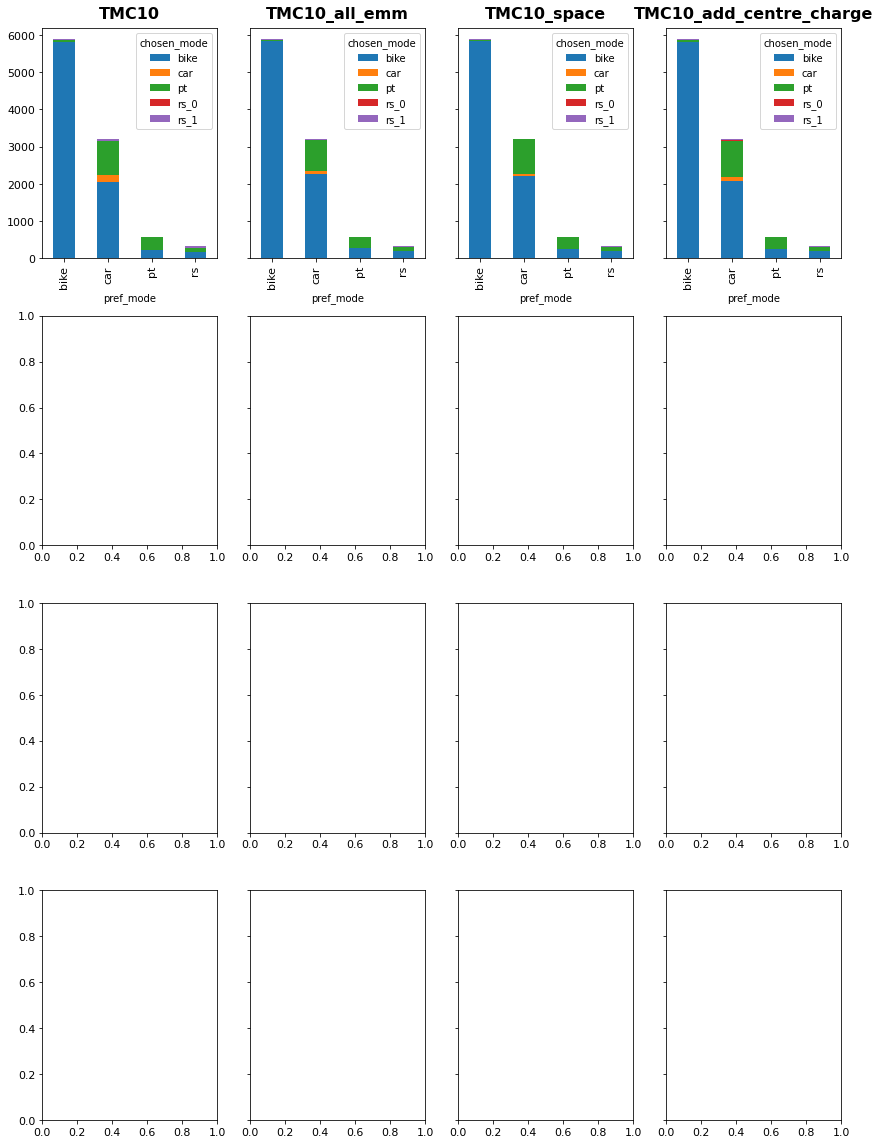

In [26]:
fig, axes = plt.subplots(nrows=4, ncols=n_tmc_scenarios, figsize=(12, 16), sharey='row')
i = 0
for scheme in dem_mgmt_schemes:
    if scheme.startswith("tmc"):
        df = travs_df[scheme].copy()
        # df['pref_mode_group'] = pd.qcut(travs_df[scheme]['preferred_mode'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
        pivot_table = df.groupby(['pref_mode', 'chosen_mode']).size().unstack(fill_value=0)
        pivot_table.plot(kind='bar', stacked=True, ax=axes[0, i])
        
        # mean_money_per_group = df.groupby('VoT_group')['money_balance'].mean()
        # mean_money_per_group.plot(kind='bar', stacked=True, ax=axes[1, i])

        # df.boxplot(column='money_balance', by='VoT_group', grid=False, ax=axes[1, i])

        # df['ASC_car_group'] = pd.qcut(travs_df[scheme]['ASC_car'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
        # pivot_table_asc_car = df.groupby(['ASC_car_group', 'chosen_mode']).size().unstack(fill_value=0)
        # pivot_table_asc_car.plot(kind='bar', stacked=True, ax=axes[2, i])

        # df.boxplot(column='money_balance', by='ASC_car_group', grid=False, ax=axes[3, i])

        # Subtitle for scheme
        axes[0, i].set_title('{}'.format(scheme.replace("tmc", "TMC")), fontweight='bold', pad=10, fontsize=16)

        i+=1
fig.tight_layout()
for a in axes.flatten():
    a.tick_params(axis='both', which='major', labelsize=11)
plt.savefig(os.path.join(path, 'plots', str(repl_id), 'market-share-ASC.png'), facecolor='w')

In [27]:
travs_df['tmc10'].keys()
# travs_df.keys()

Index(['pax', 'chosen_mode', 'time_occ_1', 'time_occ_2', 'informed',
       'days_since_reg', 'tmc_balance', 'net_purchase', 'denied_order',
       'money_balance', 'tot_credit_bought', 'tot_credit_sold', 'requests_0',
       'requests_1', 'gets_offer_0', 'gets_offer_1', 'accepts_offer_0',
       'accepts_offer_1', 'xp_wait_0', 'xp_wait_1', 'corr_xp_wait_0',
       'corr_xp_wait_1', 'xp_ivt_0', 'xp_ivt_1', 'xp_km_fare_0',
       'xp_km_fare_1', 'registered_0', 'registered_1', 'expected_wait_0',
       'expected_wait_1', 'expected_ivt_0', 'expected_ivt_1',
       'expected_km_fare_0', 'expected_km_fare_1', 'Unnamed: 0', 'pax_id',
       'origin', 'destination', 'treq', 'dist', 'ttrav_car', 'ttrav_bike',
       'PT_ivTime', 'PT_waitingTime', 'PTfare', 'through_center', 'haver_dist',
       'VoT', 'ASC_rs', 'ASC_pool', 'ASC_car', 'ASC_pt', 'ASC_bike',
       'multihoming', 'net_bought', 'pref_mode'],
      dtype='object')

In [28]:
cgp_costs = dict()
for scheme in dem_mgmt_schemes:
    if scheme.startswith("cgp"):
        cgp_costs[scheme] = pd.read_csv(os.path.join(result_path, '{}-{}'.format(scheme, scenario_name), 'day_{}_travs.csv'.format(params[scheme]['nD']-1)))['paid_cgp']
        for day_left in range(2, n_days_eql+1):
            day_df = pd.read_csv(os.path.join(result_path, '{}-{}'.format(scheme, scenario_name), 'day_{}_travs.csv'.format(params[scheme]['nD'] - day_left)))
            cgp_costs[scheme] += day_df['paid_cgp']
        cgp_costs[scheme] = cgp_costs[scheme] / n_days_eql

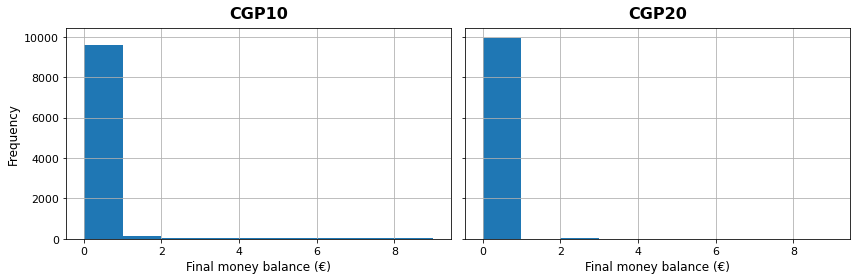

In [29]:
def count_startswith(lst, prefix):
    return sum(1 for item in lst if item.startswith(prefix))

n_cgp_scenarios = count_startswith(dem_mgmt_schemes, "cgp")

if n_cgp_scenarios > 1:
    fig, axes = plt.subplots(nrows=1, ncols=n_cgp_scenarios, figsize=(12, 4), sharey='row')
    i = 0
    for scheme in dem_mgmt_schemes:
        if scheme.startswith("cgp"):
            cgp_costs[scheme].hist(ax=axes[i], bins=np.arange(0, 10, 1))
            axes[i].set_xlabel('Final money balance (€)', fontsize=12)
            # axes[i].set_xlim(-400,100)

            # Subtitle for scheme
            axes[i].set_title('{}'.format(scheme.replace("cgp", "CGP")), fontweight='bold', pad=10, fontsize=16)

            i+=1
    axes[0].set_ylabel('Frequency', fontsize=12)
    # axes[1, 0].set_ylabel('Frequency', fontsize=12)

    for a in axes.flatten():
        a.tick_params(axis='both', which='major', labelsize=11)

else:
    
    for scheme in dem_mgmt_schemes:
        if scheme.startswith("cgp"):
            cgp_costs[scheme].hist(bins=np.arange(0, 10, 0.25))
            ax.set_xlabel('Final money balance (€)', fontsize=12)
            # ax.set_xlim(-400,100)

            # Subtitle for scheme
            ax.set_title('{}'.format(scheme.replace("cgp", "CGP")), fontweight='bold', pad=10, fontsize=16)
            i+=1
    ax.set_ylabel('Frequency', fontsize=12)
    plt.show()

fig.tight_layout()
plt.savefig(os.path.join(path, 'plots', str(repl_id), 'cgp-paid-distr.png'), facecolor='w')

In [30]:
travs_multiple_day = dict()
pax_prop = dict()
# day=0
for scheme in dem_mgmt_schemes:
    pax_prop = pd.read_csv(os.path.join(result_path, '{}-{}'.format(scheme, scenario_name), '1_pax-properties.csv'))
    if scheme.startswith("tmc"):
        df = pd.read_csv(os.path.join(result_path, '{}-{}'.format(scheme, scenario_name), 'day_{}_travs.csv'.format(params[scheme]['nD'] - params[scheme]['tmc']['duration'])))['chosen_mode'].rename('chosen_mode_0')
        for day in range(1, params[scheme]['tmc']['duration']):
            new_day = pd.read_csv(os.path.join(result_path, '{}-{}'.format(scheme, scenario_name), 'day_{}_travs.csv'.format(params[scheme]['nD'] - params[scheme]['tmc']['duration'] + day)))
            df = pd.concat([df, new_day['chosen_mode'].rename('chosen_mode_{}'.format(day))], axis=1)
    else:
        df = pd.read_csv(os.path.join(result_path, '{}-{}'.format(scheme, scenario_name), 'day_{}_travs.csv'.format(params[scheme]['nD'] - n_days_eql)))['chosen_mode'].rename('chosen_mode_0')
        for day in range(1,n_days_eql):
            new_day = pd.read_csv(os.path.join(result_path, '{}-{}'.format(scheme, scenario_name), 'day_{}_travs.csv'.format(params[scheme]['nD'] - n_days_eql + day)))
            df = pd.concat([df, new_day['chosen_mode'].rename('chosen_mode_{}'.format(day))], axis=1)
                # # travs_multiple_day[scheme] = pd.concat([travs_multiple_day[scheme], pax_prop], axis=1)
        # last_day = evo_df[scheme].index.values[-1]
        # travs_df[scheme] = pd.read_csv(os.path.join(result_path, '{}-{}'.format(scheme, scenario_name), 'day_{}_travs.csv'.format(last_day)))
    travs_multiple_day[scheme] = pd.concat([pax_prop['through_center'], df], axis=1)
travs_multiple_day['None']

,through_center,chosen_mode_0,chosen_mode_1,chosen_mode_2,chosen_mode_3,chosen_mode_4,chosen_mode_5,chosen_mode_6,chosen_mode_7,chosen_mode_8,chosen_mode_9
0,True,rs_1,rs_1,rs_1,rs_0,rs_1,rs_1,rs_1,rs_0,rs_1,rs_1
1,True,bike,bike,bike,bike,bike,bike,bike,bike,bike,bike
2,False,bike,bike,bike,bike,bike,bike,bike,bike,bike,bike
3,True,car,car,car,car,car,car,car,car,car,car
4,False,car,car,bike,bike,car,car,car,bike,car,bike
...,...,...,...,...,...,...,...,...,...,...,...
9995,False,bike,bike,bike,bike,bike,bike,bike,bike,bike,bike
9996,False,bike,bike,bike,bike,bike,bike,bike,bike,bike,bike
9997,True,car,bike,bike,car,car,bike,bike,car,car,car
9998,True,rs_1,rs_0,rs_1,pt,car,pt,rs_1,pt,rs_1,pt


,None,cgp10,cgp20,city_cgp10,city_cgp20,lpr,tmc10,tmc10_all_emm,tmc10_space,tmc10_add_centre_charge
bike,66.791849,71.889374,73.170306,72.253275,73.342067,70.264920,75.769044,77.780689,77.028627,78.046579
car,15.219796,4.279476,0.931587,4.291121,0.957787,7.871907,6.109656,4.614265,4.613295,2.814168
not_enough_credit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001941,NaN
pt,11.132460,14.707424,16.197962,14.914119,16.780204,13.895197,14.629791,14.519165,15.476953,17.233382
rs_0,2.439592,0.369723,0.061135,0.387191,0.104803,2.832606,0.668607,0.442504,0.381368,0.180495
rs_1,4.416303,8.754003,9.639010,8.154294,8.815138,5.135371,2.822902,2.643377,2.497817,1.725376


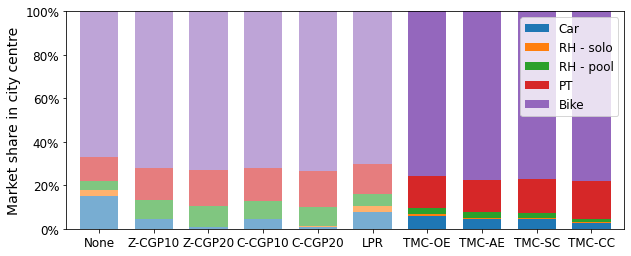

In [31]:
# Market share - only in centre (mean of all days)
centre_ms = dict()
for scheme in dem_mgmt_schemes:
    # Each day, we take the dataframe with passsengers
    centre_df = travs_multiple_day[scheme].loc[travs_multiple_day[scheme]['through_center']].copy()
    chosen_mode_counts = centre_df.filter(like='chosen_mode').apply(pd.Series.value_counts)
    centre_ms[scheme] = chosen_mode_counts.sum(axis=1) / chosen_mode_counts.sum().sum() * 100

centre_ms = pd.DataFrame(centre_ms)
ax = centre_ms.T[['car','rs_0','rs_1', 'pt', 'bike','not_enough_credit']].plot.bar(stacked=True, rot=0, width=0.7, figsize=(10,4))

ax.set_xticklabels(dem_mgmt_labels)
ax.set_ylim(0,100)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
modal_split_trips

ax.set_ylabel('Market share in city centre', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

ax.legend(mode_labels, fontsize=12)

alpha_array = np.array([1.0 if name.startswith('tmc') else 0.6 for name in dem_mgmt_schemes])
# Apply transparency conditionally for each bar segment
for container in ax.containers:
    for i, bar in enumerate(container):
        bar.set_alpha(alpha_array[i])

plt.savefig(os.path.join(path, 'plots', str(repl_id),'market-shares_centre.png'), facecolor='w')
centre_ms

In [32]:
travs_df[scheme].loc[travs_df[scheme]['through_center']]['chosen_mode']
centre_df

,through_center,chosen_mode_0,chosen_mode_1,chosen_mode_2,chosen_mode_3,chosen_mode_4,chosen_mode_5,chosen_mode_6,chosen_mode_7,chosen_mode_8,...,chosen_mode_20,chosen_mode_21,chosen_mode_22,chosen_mode_23,chosen_mode_24,chosen_mode_25,chosen_mode_26,chosen_mode_27,chosen_mode_28,chosen_mode_29
0,True,bike,rs_1,rs_1,rs_1,rs_1,rs_1,rs_1,rs_1,bike,...,bike,bike,bike,bike,bike,bike,bike,bike,bike,bike
1,True,bike,bike,bike,bike,bike,bike,bike,bike,bike,...,bike,bike,bike,bike,bike,bike,bike,bike,bike,bike
3,True,pt,car,car,car,car,car,car,car,car,...,pt,car,car,pt,pt,car,pt,pt,pt,pt
7,True,pt,car,pt,pt,pt,pt,pt,pt,pt,...,pt,pt,pt,pt,pt,pt,pt,pt,pt,pt
13,True,bike,bike,bike,bike,bike,bike,bike,bike,bike,...,bike,bike,bike,bike,bike,bike,bike,bike,bike,bike
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,True,pt,bike,pt,pt,pt,pt,pt,pt,pt,...,pt,pt,pt,pt,bike,pt,pt,pt,pt,pt
9993,True,pt,pt,pt,pt,pt,pt,pt,car,pt,...,pt,bike,bike,bike,pt,pt,pt,pt,bike,pt
9997,True,bike,bike,bike,bike,bike,bike,bike,bike,bike,...,bike,bike,bike,bike,bike,bike,bike,bike,bike,bike
9998,True,pt,pt,pt,pt,pt,pt,pt,pt,pt,...,pt,pt,pt,pt,pt,pt,pt,pt,pt,pt


In [33]:
pax_df['treq_new'] = pd.to_datetime(pax_df['treq'])
pax_df.treq_new.hist()

NameError: name 'pax_df' is not defined

In [ ]:
albatross_df = pd.read_csv(os.path.join('..\..\..',r'MaaSSim\data\albatross\Amsterdam_demand.csv'))


In [ ]:
albatross_df['treq'] = pd.to_datetime(albatross_df['ET_FROM'])

In [ ]:
albatross_df.treq.dt.time

0         12:23:00
1         12:33:00
2         11:12:00
3         13:35:00
4         14:08:00
            ...   
242083    12:46:00
242084    10:33:00
242085    14:40:00
242086    12:38:00
242087    12:11:00
Name: treq, Length: 242088, dtype: object

<AxesSubplot:>

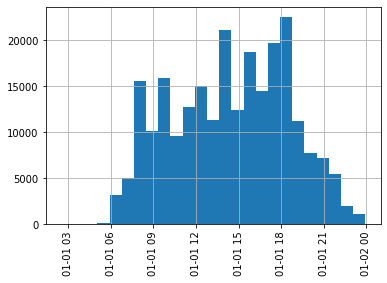

In [ ]:
plt.xticks(rotation=90)
albatross_df.treq.hist(bins=25)